In [270]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.stats as stats
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv("MichelinNY.csv",encoding='latin1')


In [271]:
# Display basic statistics of the data
print(data.describe())


# Assuming your DataFrame is named 'data'
included_in_michelin = data['InMichelin'].sum()
print("Number of restaurants included in Michelin guide:", included_in_michelin)


       InMichelin        Food       Decor     Service       Price
count  164.000000  164.000000  164.000000  164.000000  164.000000
mean     0.451220   21.243902   19.164634   19.701220   50.097561
std      0.499139    2.776152    3.792594    3.263819   22.129352
min      0.000000   15.000000   12.000000   13.000000   13.000000
25%      0.000000   19.000000   16.000000   17.000000   39.000000
50%      0.000000   21.000000   19.000000   19.000000   45.000000
75%      1.000000   23.000000   22.000000   21.250000   53.000000
max      1.000000   28.000000   28.000000   28.000000  201.000000
Number of restaurants included in Michelin guide: 74


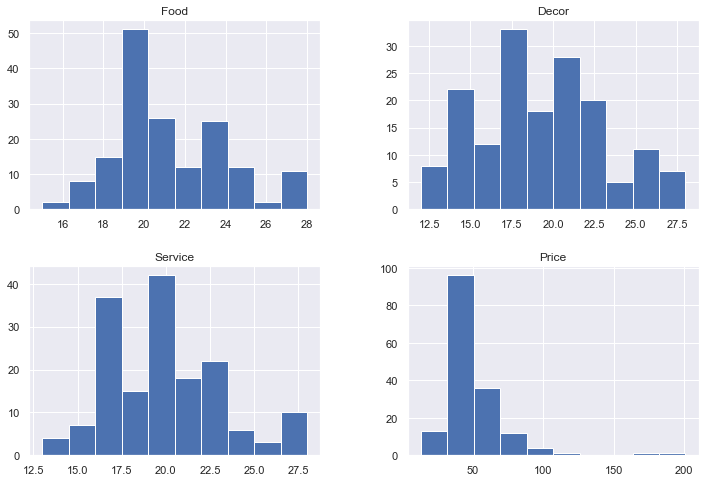

,InMichelin,Restaurant Name,Food,Decor,Service,Price
0,0,14 Wall Street,19,20,19,50
1,0,212,17,17,16,43
2,0,26 Seats,23,17,21,35
3,1,44,19,23,16,52
4,0,A,23,12,19,24
...,...,...,...,...,...,...
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40


In [272]:


# Visualize the distribution of ratings
data[['Food', 'Decor', 'Service', 'Price']].hist(bins=10, figsize=(12, 8))
plt.show()

# Handle missing data if any
data.dropna()  # You can choose an appropriate method for handling missing data


In [273]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Food', 'Decor', 'Service', 'Price']])


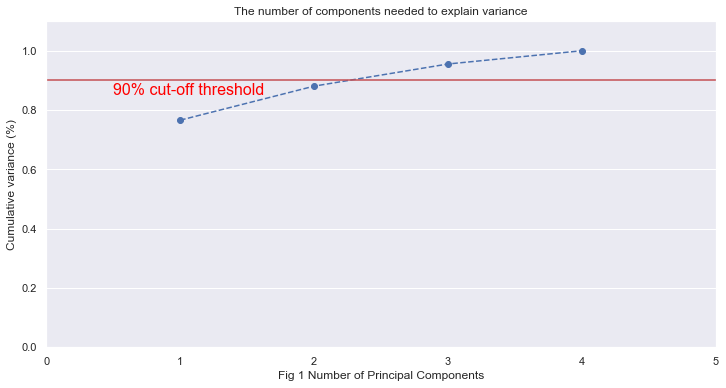

In [274]:
pca = PCA().fit(scaled_data)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Fig 1 Number of Principal Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()


In [275]:
pc = [i for i in range(1,5)]
for pc_i,cum_sum in zip(pc,y):
    print(f'Percentage cumulative variance explained by pc{pc_i}: {cum_sum}')

Percentage cumulative variance explained by pc1: 0.765788101577606
Percentage cumulative variance explained by pc2: 0.8806107085691381
Percentage cumulative variance explained by pc3: 0.9552859578242161
Percentage cumulative variance explained by pc4: 0.9999999999999999


In [276]:


# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
#pca = pca.fit_transform(scaled_data)

pca.fit(scaled_data)

pca.explained_variance_


array([3.08194475, 0.46210816])

In [277]:
pca.explained_variance_ratio_

array([0.7657881 , 0.11482261])

Text(0.5, 1.0, 'Fig 2. Component Variance')

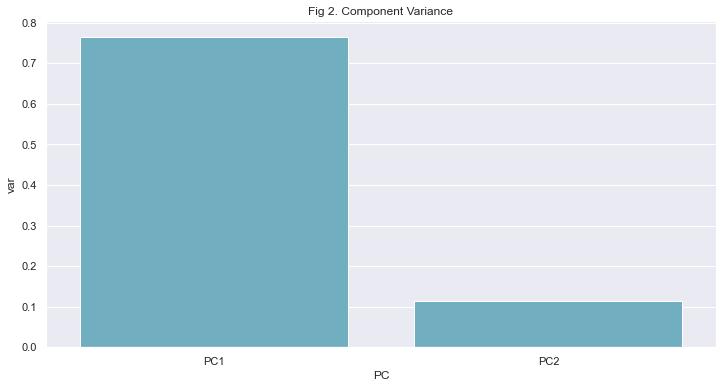

In [278]:
import seaborn as sn
dfScree = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2']})
sn.barplot(x='PC',y="var",data=dfScree, color="c").set_title('Fig 2. Component Variance')

In [279]:
x_pca=pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(164, 4)
(164, 2)


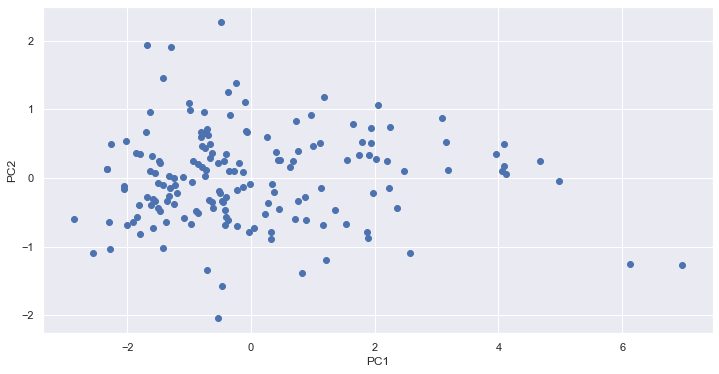

In [280]:
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




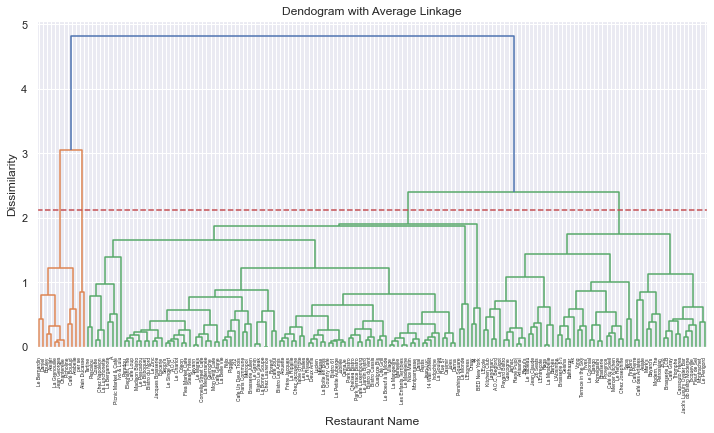

In [281]:


average_linked = linkage(x_pca, method='average')
# Extract the linkage heights from the linkage matrix
linkage_heights = average_linked[:, 2]

# Calculate the mean height (h)
h = np.mean(linkage_heights)

# Calculate the standard deviation of linkage heights (sh)
sh = np.std(linkage_heights)




dendrogram(average_linked, orientation='top', labels=data['Restaurant Name'].tolist(), distance_sort='descending')
# Add a horizontal line at a specific height (h + 3sh)
plt.axhline(y=h + 3 * sh, color='r', linestyle='--', label='Threshold')
plt.ylabel('Dissimilarity')
plt.xlabel('Restaurant Name')
plt.title('Dendogram with Average Linkage')


plt.show()


In [282]:
# Determine the cutoff height based on your criteria
cutoff_height = h + 3 * sh

# Assign cluster labels based on the cutoff height
cluster_labels = fcluster(average_linked, t=cutoff_height, criterion='distance')

cluster_labels


array([2, 2, 1, 2, 2, 2, 1, 1, 3, 2, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 4, 1, 1, 2, 1, 2, 2, 2, 2, 2, 4, 1, 1, 1, 1, 2, 1, 2, 4, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 4, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 1, 4, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 1, 4, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1], dtype=int32)

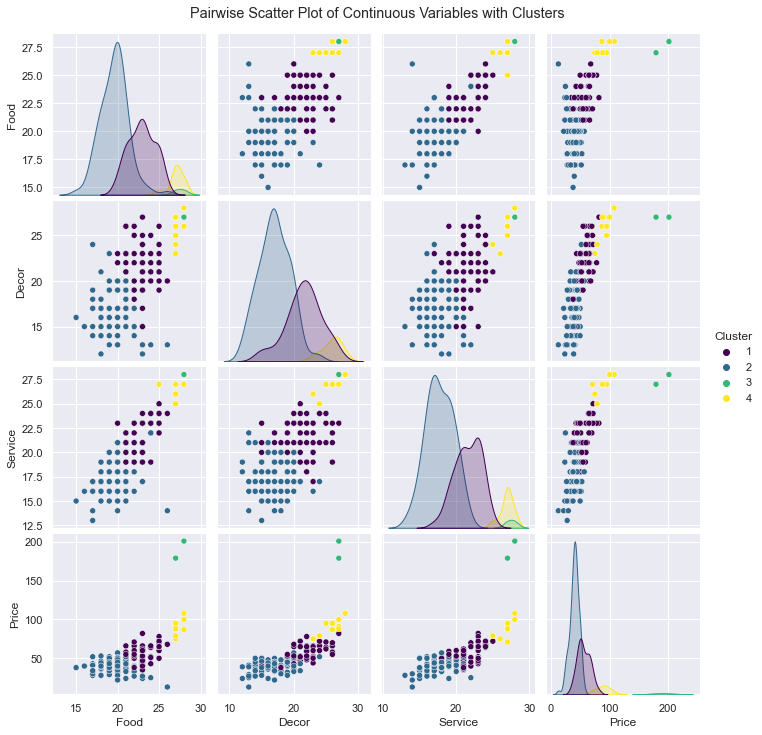

In [283]:
variables = ['Food', 'Decor', 'Service', 'Price']

# Add the 'Cluster' column for coloring the points
data['Cluster'] = cluster_labels  # Assuming you've already calculated cluster_labels

# Create a pairplot
sns.set(style='darkgrid')  # Adjust the style as needed
sns.pairplot(data=data, vars=variables, hue='Cluster', palette='viridis')
plt.suptitle('Pairwise Scatter Plot of Continuous Variables with Clusters', y=1.02)
plt.show()

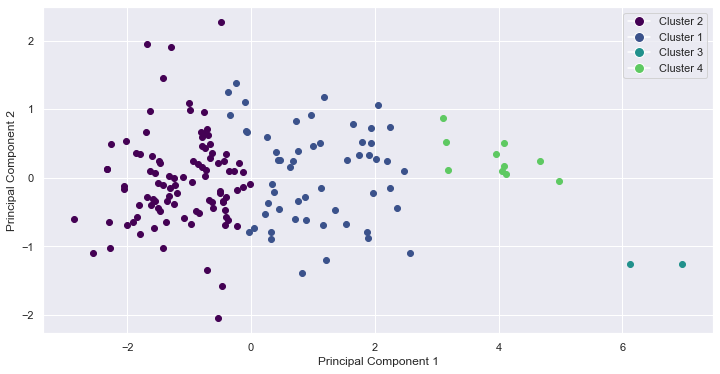

In [284]:
import matplotlib.pyplot as plt

# Assuming you have x_pca and data['Cluster'] defined

# Get unique cluster labels and corresponding colors
unique_labels = data['Cluster'].unique()
cluster_colors = [plt.cm.viridis(i / len(unique_labels)) for i in range(len(unique_labels))]

# Scatter plot with custom colors
for i, label in enumerate(unique_labels):
    plt.scatter(x_pca[data['Cluster'] == label, 0], x_pca[data['Cluster'] == label, 1], label=f'Cluster {label}', c=[cluster_colors[i]])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a custom legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=10, label=f'Cluster {label}') for i, label in enumerate(unique_labels)]
plt.legend(handles=legend_handles)

plt.show()


In [285]:
data.groupby(['Cluster','InMichelin']).size().unstack(fill_value=0)

InMichelin,0,1
Cluster,,
1,13,42
2,75,22
3,0,2
4,2,8


In [286]:
data.groupby(['Cluster'])['InMichelin'].mean()

Cluster
1    0.763636
2    0.226804
3    1.000000
4    0.800000
Name: InMichelin, dtype: float64

In [291]:
# Separate your data into different groups based on cluster labels
group1 = data[data['Cluster'] == 1]['InMichelin']
group2 = data[data['Cluster'] == 2]['InMichelin']
group3 = data[data['Cluster'] == 3]['InMichelin']
group4 = data[data['Cluster'] == 4]['InMichelin']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3, group4)

print(p_value)

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences among the clusters.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences among the clusters.")

3.102796177722307e-12
Reject the null hypothesis. There are significant differences among the clusters.


In [293]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

# Create a model for the ANOVA test
model = sm.OLS.from_formula('InMichelin ~ C(Cluster)', data=data).fit()

# Perform Tukey's HSD test
mc = MultiComparison(data['InMichelin'], data['Cluster'])
result = mc.tukeyhsd()

# Print the summary of the post hoc test
print(result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.5368  0.001 -0.7219 -0.3517   True
     1      3   0.2364 0.8491  -0.553  1.0257  False
     1      4   0.0364    0.9 -0.3406  0.4133  False
     2      3   0.7732 0.0545 -0.0101  1.5565  False
     2      4   0.5732  0.001   0.209  0.9374   True
     3      4     -0.2    0.9 -1.0494  0.6494  False
----------------------------------------------------
